In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:

file_path = "car_purchasing.csv"  # load the data set
df = pd.read_csv(file_path, encoding="ISO-8859-1")

Model Performance:
MAE: 6488.70
MSE: 66611367.40
RMSE: 8161.58


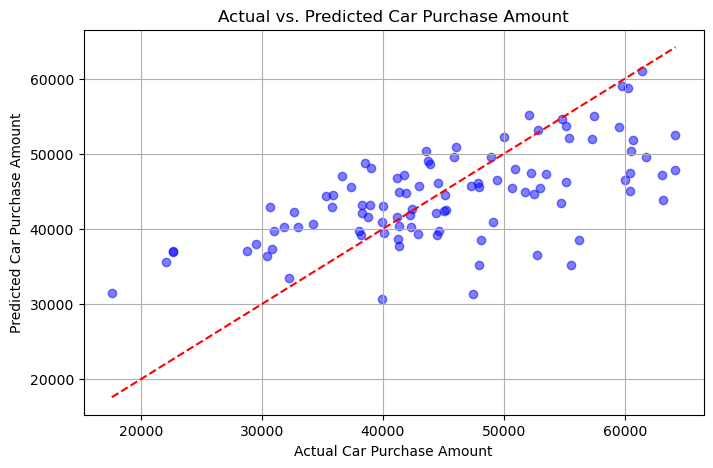

In [24]:
# Rename columns for easier access
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Select relevant columns
df = df[['annual_salary', 'credit_card_debt', 'car_purchase_amount']]

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Define features (X) and target variable (y)
X = df[['annual_salary', 'credit_card_debt']]
y = df['car_purchase_amount']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Model Performance:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}")

# Visualization - Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Car Purchase Amount")
plt.ylabel("Predicted Car Purchase Amount")
plt.title("Actual vs. Predicted Car Purchase Amount")
plt.grid(True)
plt.show()